In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    'D:\Projects_25\Energy_Ananlysis\energy\Datasets\household_power_consumption.txt',  
    sep=';',                                       # columns are separated by semicolons
    parse_dates={'datetime': ['Date', 'Time']},    # merge 'Date' and 'Time' into one datetime column
    infer_datetime_format=True,                    # try to automatically detect datetime format
    na_values='?',                                 # treat '?' as missing values (NaN)
    low_memory=False                               # process file in one go (avoids type guessing issues)
)


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\fateh\AppData\Local\Temp\ipykernel_13784\452924391.py:2: SyntaxWarning: invalid escape sequence '\P'
  'D:\Projects_25\Energy_Ananlysis\energy\Datasets\household_power_consumption.txt',  # file path
C:\Users\fateh\AppData\Local\Temp\ipykernel_13784\452924391.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\fateh\AppData\Local\Temp\ipykernel_13784\452924391.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\fateh\AppData\Local\Temp\ipykernel_13784\452924391.py:1: UserWarning: Parsing dates

In [4]:
print(df.head())

             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None


In [6]:
df.set_index('datetime', inplace=True)


In [7]:
df_hourly = df.resample('H').mean()


C:\Users\fateh\AppData\Local\Temp\ipykernel_13784\1135564676.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


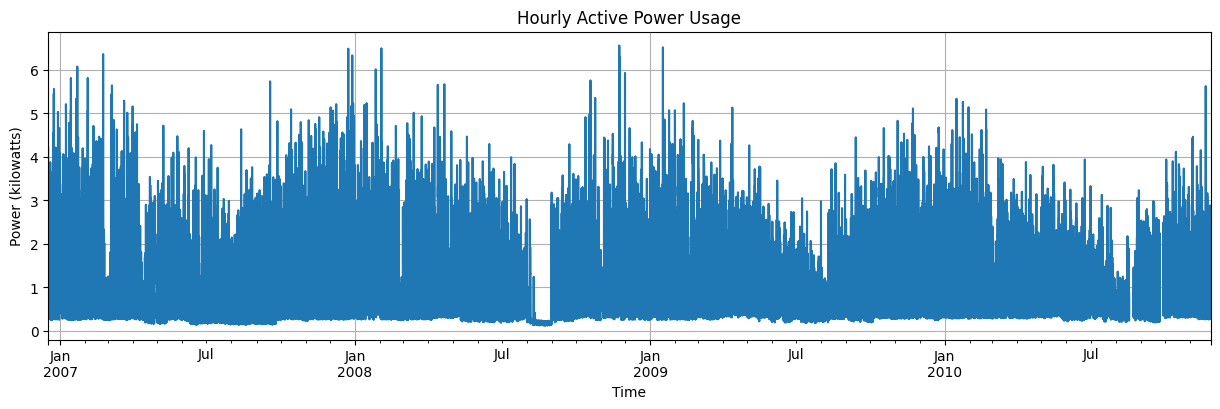

In [8]:
df_hourly['Global_active_power'].plot(figsize=(15, 4), title='Hourly Active Power Usage')
plt.xlabel("Time")
plt.ylabel("Power (kilowatts)")
plt.grid(True)
plt.show()


In [11]:
df_hourly['hour'] = df_hourly.index.hour           # 0 to 23
df_hourly['dayofweek'] = df_hourly.index.dayofweek # 0 = Monday, 6 = Sunday
df_hourly['month'] = df_hourly.index.month         # 1 to 12
df_hourly['is_weekend'] = df_hourly['dayofweek'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday


In [13]:
print(df_hourly[['Global_active_power', 'hour', 'dayofweek', 'month', 'is_weekend']].head())


                     Global_active_power  hour  dayofweek  month  is_weekend
datetime                                                                    
2006-12-16 17:00:00             4.222889    17          5     12           1
2006-12-16 18:00:00             3.632200    18          5     12           1
2006-12-16 19:00:00             3.400233    19          5     12           1
2006-12-16 20:00:00             3.268567    20          5     12           1
2006-12-16 21:00:00             3.056467    21          5     12           1


In [15]:
df_hourly['lag_1'] = df_hourly['Global_active_power'].shift(1)  # 1 hour ago
df_hourly['lag_2'] = df_hourly['Global_active_power'].shift(2)  # 2 hours ago
df_hourly['lag_24'] = df_hourly['Global_active_power'].shift(24)  # 24 hours ago (same hour previous day)


In [18]:
df_hourly[['Global_active_power', 'lag_1', 'lag_2', 'lag_24']].head(30)


,Global_active_power,lag_1,lag_2,lag_24
datetime,,,,
2006-12-17 17:00:00,3.406767,3.326033,2.985400,4.222889
2006-12-17 18:00:00,3.697100,3.406767,3.326033,3.632200
2006-12-17 19:00:00,2.908400,3.697100,3.406767,3.400233
2006-12-17 20:00:00,3.361500,2.908400,3.697100,3.268567
2006-12-17 21:00:00,3.040767,3.361500,2.908400,3.056467
2006-12-17 22:00:00,1.518000,3.040767,3.361500,2.200133
2006-12-17 23:00:00,0.437733,1.518000,3.040767,2.061600
2006-12-18 00:00:00,0.276367,0.437733,1.518000,1.882467
2006-12-18 01:00:00,0.313300,0.276367,0.437733,3.349400


In [17]:
df_hourly.dropna(inplace=True)


In [19]:
df_hourly['rolling_mean_3'] = df_hourly['Global_active_power'].rolling(window=3).mean()
df_hourly['rolling_mean_24'] = df_hourly['Global_active_power'].rolling(window=24).mean()


In [20]:
df_hourly.dropna(inplace=True)


In [21]:
# Target variable
target = 'Global_active_power'

# Features for prediction
features = [
    'hour', 'dayofweek', 'month', 'is_weekend',
    'lag_1', 'lag_2', 'lag_24',
    'rolling_mean_3', 'rolling_mean_24'
]


In [24]:
train_size = int(len(df_hourly) * 0.8)
train = df_hourly.iloc[:train_size]
test = df_hourly.iloc[train_size:]


In [25]:
print(train_size)

27166


In [26]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [36]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print nicely
print("For Random Forest")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")
print(f"R² Score: {r2_rf:.3f}")

For Random Forest
Mean Squared Error (MSE): 0.004
Mean Absolute Error (MAE): 0.030
R² Score: 0.993


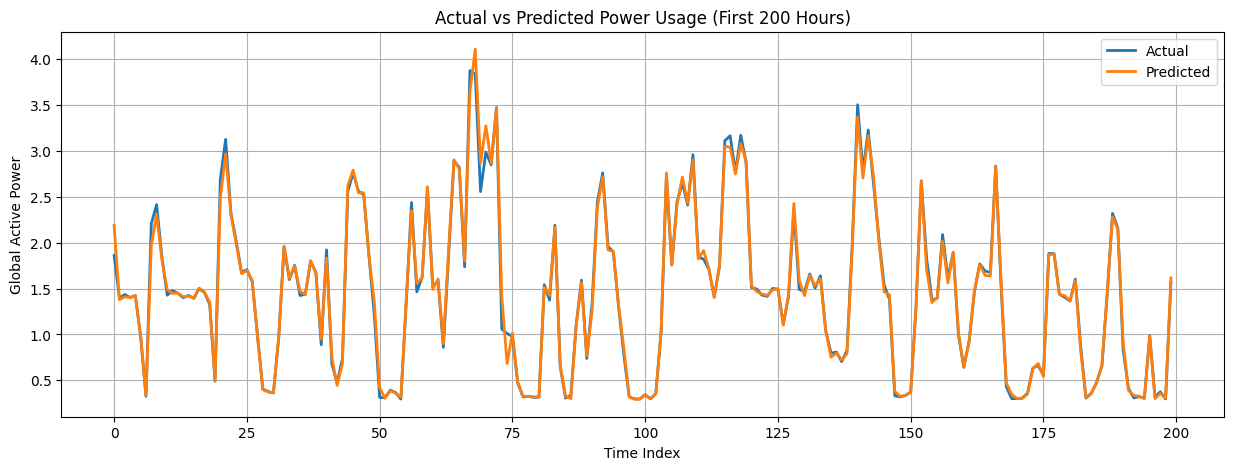

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test.values[:200], label='Actual', linewidth=2)
plt.plot(y_pred_rf[:200], label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Power Usage (First 200 Hours)')
plt.xlabel('Time Index')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import xgboost as xgb

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


xgb_model = XGBRegressor(
    n_estimators=100,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=6,          # tree depth
    random_state=42,
    objective='reg:squarederror'  
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)




In [ ]:
# Evaluate
mse_xg = mean_squared_error(y_test, y_pred_xgb)
mae_xg = mean_absolute_error(y_test, y_pred_xgb)
r2_xg = r2_score(y_test, y_pred_xgb)

print("For XG Boost")
print(f"📊 Mean Squared Error (XGBoost): {mse_xg:.4f}")
print(f"📉 Mean Absolute Error (XGBoost): {mae_xg:.4f}")
print(f"🎯 R² Score (XGBoost): {r2_xg:.4f}")

For XG Boost
📊 Mean Squared Error (XGBoost): 0.0045
📉 Mean Absolute Error (XGBoost): 0.0411
🎯 R² Score (XGBoost): 0.9919


In [45]:
import joblib

joblib.dump(model_rf, 'rf_model_hourly.pkl')

joblib.dump(X_train.columns.tolist(), 'rf_features.pkl')



['rf_features.pkl']